In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('./dataset/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


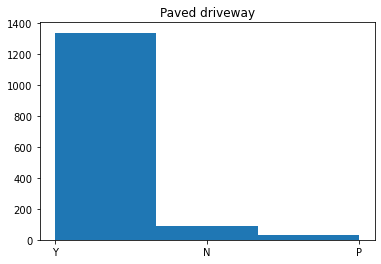

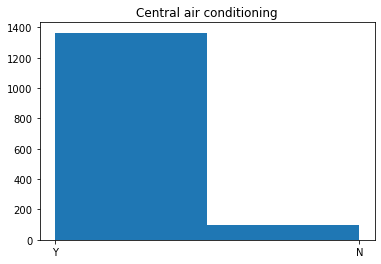

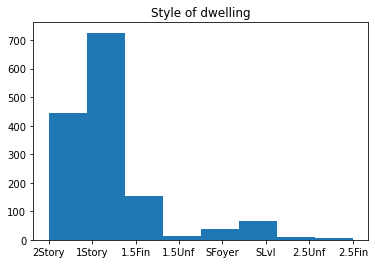

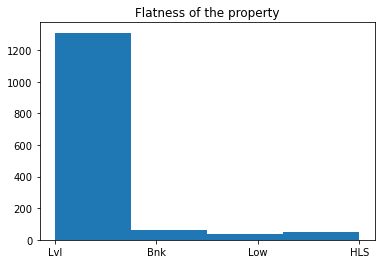

In [6]:
plt.hist(df_train['PavedDrive'], bins=3)
plt.title('Paved driveway')
plt.show()

plt.hist(df_train['CentralAir'], bins=2)
plt.title('Central air conditioning')
plt.show()

plt.hist(df_train['HouseStyle'], bins=8)
plt.title('Style of dwelling')
plt.show()

plt.hist(df_train['LandContour'], bins=4)
plt.title('Flatness of the property')
plt.show()

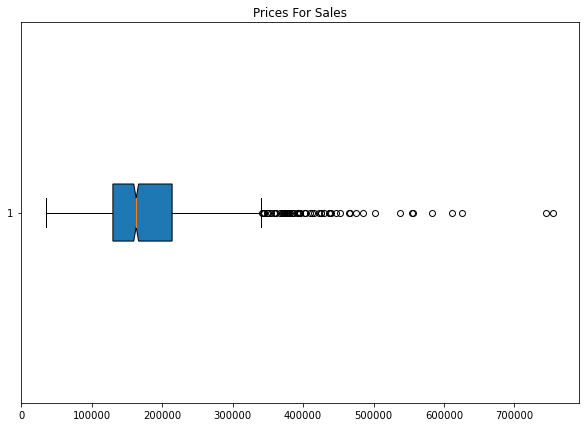

In [7]:
data = [df_train['SalePrice']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0)

# Adding title
plt.title("Prices For Sales")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

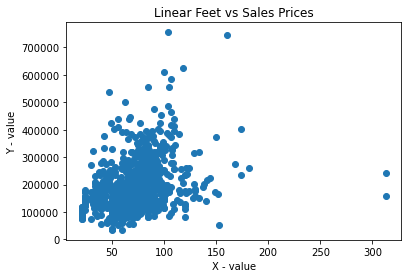

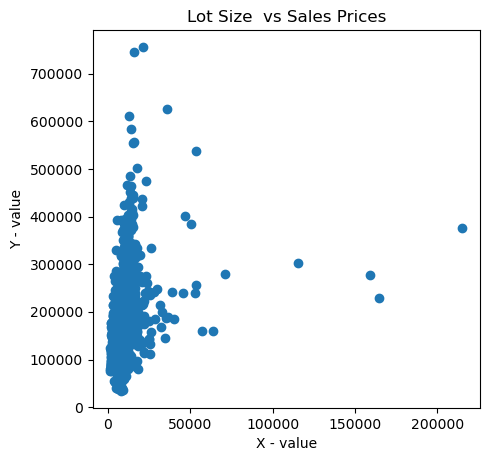

In [8]:
plt.scatter(df_train['LotFrontage'], df_train['SalePrice'])
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.title('Linear Feet vs Sales Prices')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

plt.scatter(df_train['LotArea'], df_train['SalePrice'])
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.title('Lot Size  vs Sales Prices')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

### Pre Process For Dataset

Get Internal Features

In [16]:
from sklearn import preprocessing
import numpy as np

In [20]:
scaler = preprocessing.MinMaxScaler()
X = np.array(df_train['Fireplaces'])
X = X.reshape(-1, 1)
scaler.fit_transform(X)


array([[0.        ],
       [0.33333333],
       [0.33333333],
       ...,
       [0.66666667],
       [0.        ],
       [0.        ]])

In [9]:
internal_featues = [
                    'TotalBsmtSF',
                    'LowQualFinSF',
                    'GrLivArea',
                    'FullBath',
                    'GrLivArea',
                    'GarageArea',
                    'TotRmsAbvGrd']
                    'Electrical',
                    'Heating',
                    'CentralAir',
                    'Utilities',
                    'RoofStyle',
                    'RoofMatl',
                    'Exterior1st',
                    'MasVnrType',
                    'Foundation',
                    'HouseStyle',
                    
internal_features_dataset = df_train[internal_featues]

In [10]:
internal_features_dataset

,Utilities,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,MasVnrType,Foundation,BsmtFinSF1,BsmtFinSF2,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,GrLivArea
0,AllPub,1Fam,2Story,Gable,CompShg,VinylSd,BrkFace,PConc,706,0,...,Y,SBrkr,856,854,0,1710,1,0,2,1710
1,AllPub,1Fam,1Story,Gable,CompShg,MetalSd,None,CBlock,978,0,...,Y,SBrkr,1262,0,0,1262,0,1,2,1262
2,AllPub,1Fam,2Story,Gable,CompShg,VinylSd,BrkFace,PConc,486,0,...,Y,SBrkr,920,866,0,1786,1,0,2,1786
3,AllPub,1Fam,2Story,Gable,CompShg,Wd Sdng,None,BrkTil,216,0,...,Y,SBrkr,961,756,0,1717,1,0,1,1717
4,AllPub,1Fam,2Story,Gable,CompShg,VinylSd,BrkFace,PConc,655,0,...,Y,SBrkr,1145,1053,0,2198,1,0,2,2198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,AllPub,1Fam,2Story,Gable,CompShg,VinylSd,None,PConc,0,0,...,Y,SBrkr,953,694,0,1647,0,0,2,1647
1456,AllPub,1Fam,1Story,Gable,CompShg,Plywood,Stone,CBlock,790,163,...,Y,SBrkr,2073,0,0,2073,1,0,2,2073
1457,AllPub,1Fam,2Story,Gable,CompShg,CemntBd,None,Stone,275,0,...,Y,SBrkr,1188,1152,0,2340,0,0,2,2340
1458,AllPub,1Fam,1Story,Hip,CompShg,MetalSd,None,CBlock,49,1029,...,Y,FuseA,1078,0,0,1078,1,0,1,1078
